In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [4]:
BASE_FOLDER = '/content/drive/My Drive/Universidad/TFM/MVP/'

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize':(18,9)})

# Join all the features into a single dataframe

In [11]:
eth_sentiment = pd.read_csv(
    BASE_FOLDER + 'eth_sentiment.csv',
    index_col=0,
    dtype={
        "sentiment": np.float64,
    },
    parse_dates=['date']
).rename(columns={'sentiment': 'eth_sentiment'}).sort_values('date')

market_sentiment = pd.read_csv(BASE_FOLDER + 'market_sentiment.csv',
    index_col=0,
    dtype={
        "sentiment": np.float64,
    },
    parse_dates=['date']
).rename(columns={'sentiment': 'market_sentiment'}).sort_values('date')

print(eth_sentiment.info())
print()
print(market_sentiment.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           365 non-null    datetime64[ns]
 1   eth_sentiment  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 116
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              365 non-null    datetime64[ns]
 1   market_sentiment  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB
None


In [14]:
df = eth_sentiment.merge(market_sentiment, left_on='date', right_on='date').sort_values('date')
df

date  eth_sentiment  market_sentiment
0   2017-01-01       0.164965          0.220835
1   2017-01-02       0.177529          0.157046
2   2017-01-03       0.147985          0.173748
3   2017-01-04       0.093906          0.184805
4   2017-01-05       0.198199          0.164860
..         ...            ...               ...
360 2017-12-27       0.296234          0.299734
361 2017-12-28       0.289531          0.292623
362 2017-12-29       0.315683          0.314816
363 2017-12-30       0.345165          0.468484
364 2017-12-31       0.425373          0.420462

[365 rows x 3 columns]

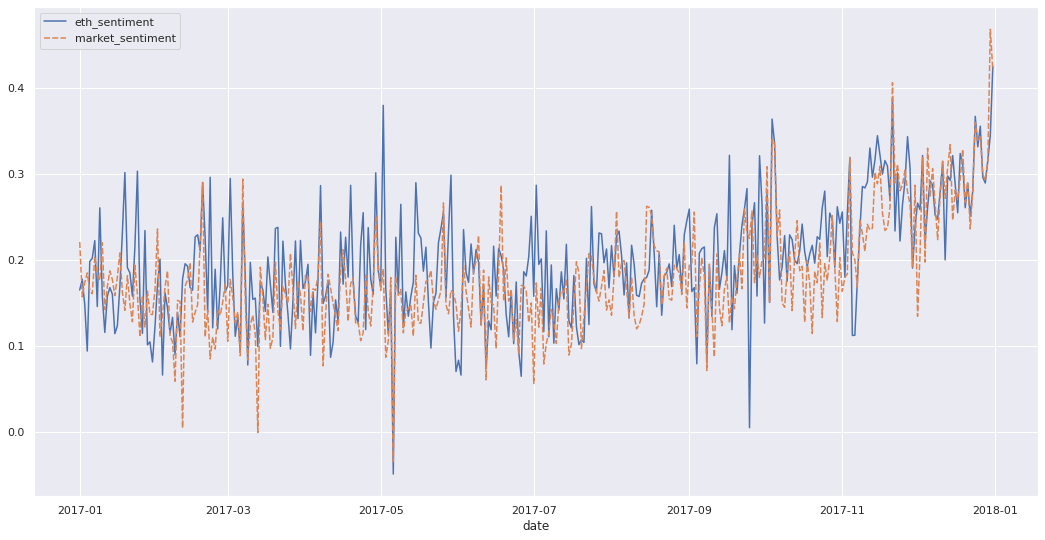

In [15]:
sns.lineplot(data=df.set_index('date'))

In [17]:
historical_values = pd.read_csv(BASE_FOLDER + 'historical_values.csv', parse_dates=['date']).drop(columns=['Unnamed: 0'])

historical_values

date  market_capitalization   close    open     max     min
0   2017-01-01           1.773550e+10    8.20    8.17    8.59    8.03
1   2017-01-02           1.832280e+10    8.37    8.19    8.50    8.11
2   2017-01-03           1.875420e+10    9.74    8.43    9.90    8.30
3   2017-01-04           1.927560e+10   11.00    9.57   11.10    9.44
4   2017-01-05           2.138630e+10   10.15   11.16   11.70    9.20
..         ...                    ...     ...     ...     ...     ...
360 2017-12-27           6.034585e+11  736.45  749.80  766.06  703.27
361 2017-12-28           6.004497e+11  711.42  736.45  740.30  652.00
362 2017-12-29           5.718795e+11  731.52  711.42  755.00  703.02
363 2017-12-30           6.156341e+11  682.22  731.52  737.56  640.43
364 2017-12-31           5.597552e+11  736.77  682.22  741.99  675.56

[365 rows x 6 columns]

In [18]:
# merging dataframes with data
df = df.merge(historical_values, left_on='date', right_on='date')

In [19]:
df.sort_values(by=['date'], inplace=True)

In [20]:
df

date  eth_sentiment  market_sentiment  ...    open     max     min
0   2017-01-01       0.164965          0.220835  ...    8.17    8.59    8.03
1   2017-01-02       0.177529          0.157046  ...    8.19    8.50    8.11
2   2017-01-03       0.147985          0.173748  ...    8.43    9.90    8.30
3   2017-01-04       0.093906          0.184805  ...    9.57   11.10    9.44
4   2017-01-05       0.198199          0.164860  ...   11.16   11.70    9.20
..         ...            ...               ...  ...     ...     ...     ...
360 2017-12-27       0.296234          0.299734  ...  749.80  766.06  703.27
361 2017-12-28       0.289531          0.292623  ...  736.45  740.30  652.00
362 2017-12-29       0.315683          0.314816  ...  711.42  755.00  703.02
363 2017-12-30       0.345165          0.468484  ...  731.52  737.56  640.43
364 2017-12-31       0.425373          0.420462  ...  682.22  741.99  675.56

[365 rows x 8 columns]

In [21]:
train = df
train

date  eth_sentiment  market_sentiment  ...    open     max     min
0   2017-01-01       0.164965          0.220835  ...    8.17    8.59    8.03
1   2017-01-02       0.177529          0.157046  ...    8.19    8.50    8.11
2   2017-01-03       0.147985          0.173748  ...    8.43    9.90    8.30
3   2017-01-04       0.093906          0.184805  ...    9.57   11.10    9.44
4   2017-01-05       0.198199          0.164860  ...   11.16   11.70    9.20
..         ...            ...               ...  ...     ...     ...     ...
360 2017-12-27       0.296234          0.299734  ...  749.80  766.06  703.27
361 2017-12-28       0.289531          0.292623  ...  736.45  740.30  652.00
362 2017-12-29       0.315683          0.314816  ...  711.42  755.00  703.02
363 2017-12-30       0.345165          0.468484  ...  731.52  737.56  640.43
364 2017-12-31       0.425373          0.420462  ...  682.22  741.99  675.56

[365 rows x 8 columns]

In [23]:
# our target are our close,open,max and min vlaues
target = df[['date', 'close', 'open', 'min', 'max']]
target

date   close    open     min     max
0   2017-01-01    8.20    8.17    8.03    8.59
1   2017-01-02    8.37    8.19    8.11    8.50
2   2017-01-03    9.74    8.43    8.30    9.90
3   2017-01-04   11.00    9.57    9.44   11.10
4   2017-01-05   10.15   11.16    9.20   11.70
..         ...     ...     ...     ...     ...
360 2017-12-27  736.45  749.80  703.27  766.06
361 2017-12-28  711.42  736.45  652.00  740.30
362 2017-12-29  731.52  711.42  703.02  755.00
363 2017-12-30  682.22  731.52  640.43  737.56
364 2017-12-31  736.77  682.22  675.56  741.99

[365 rows x 5 columns]

# PCA

We are going to implement a PCA over the train df

In [24]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [25]:
# Lets normalize the values
normalized = train.drop(columns=['date'])
normalized = (normalized-normalized.min())/(normalized.max()-normalized.min())
normalized['date'] = train['date']
train = normalized
train.head(30)

eth_sentiment  market_sentiment  ...       min       date
0        0.451427          0.508048  ...  0.000000 2017-01-01
1        0.477895          0.381331  ...  0.000108 2017-01-02
2        0.415656          0.414510  ...  0.000364 2017-01-03
3        0.301734          0.436475  ...  0.001900 2017-01-04
4        0.521436          0.396854  ...  0.001577 2017-01-05
5        0.529260          0.388416  ...  0.001941 2017-01-06
6        0.572586          0.474794  ...  0.001954 2017-01-07
7        0.410932          0.433066  ...  0.002386 2017-01-08
8        0.652900          0.419179  ...  0.001981 2017-01-09
9        0.436896          0.506232  ...  0.002925 2017-01-10
10       0.347315          0.351564  ...  0.001860 2017-01-11
11       0.435993          0.404185  ...  0.001415 2017-01-12
12       0.457321          0.441396  ...  0.001833 2017-01-13
13       0.441678          0.421563  ...  0.001995 2017-01-14
14       0.344400          0.384064  ...  0.002116 2017-01-15
15       0.363463          0.427122  ...  0.002049 2017-01-16
16       0.460165          0.482824  ...  0.002022 2017-01-17
17       0.591183          0.391607  ...  0.002305 2017-01-18
18       0.739428          0.350018  ...  0.002857 2017-01-19
19       0.506294          0.430198  ...  0.003059 2017-01-20
20       0.493524          0.365377  ...  0.003410 2017-01-21
21       0.436313          0.323602  ...  0.003113 2017-01-22
22       0.557676          0.454242  ...  0.003450 2017-01-23
23       0.742954          0.386430  ...  0.003275 2017-01-24
24       0.429858          0.288683  ...  0.003127 2017-01-25
25       0.345240          0.384140  ...  0.003235 2017-01-26
26       0.597178          0.311417  ...  0.003140 2017-01-27
27       0.316863          0.394902  ...  0.003127 2017-01-28
28       0.324148          0.340775  ...  0.003167 2017-01-29
29       0.274936          0.340445  ...  0.003167 2017-01-30

[30 rows x 8 columns]

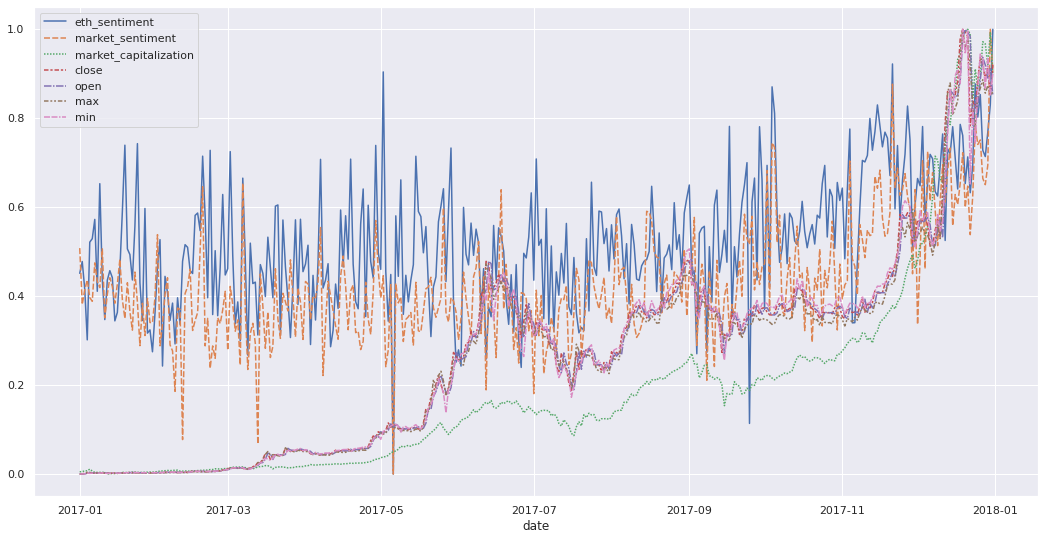

In [26]:
sns.lineplot(data=train.set_index('date'))

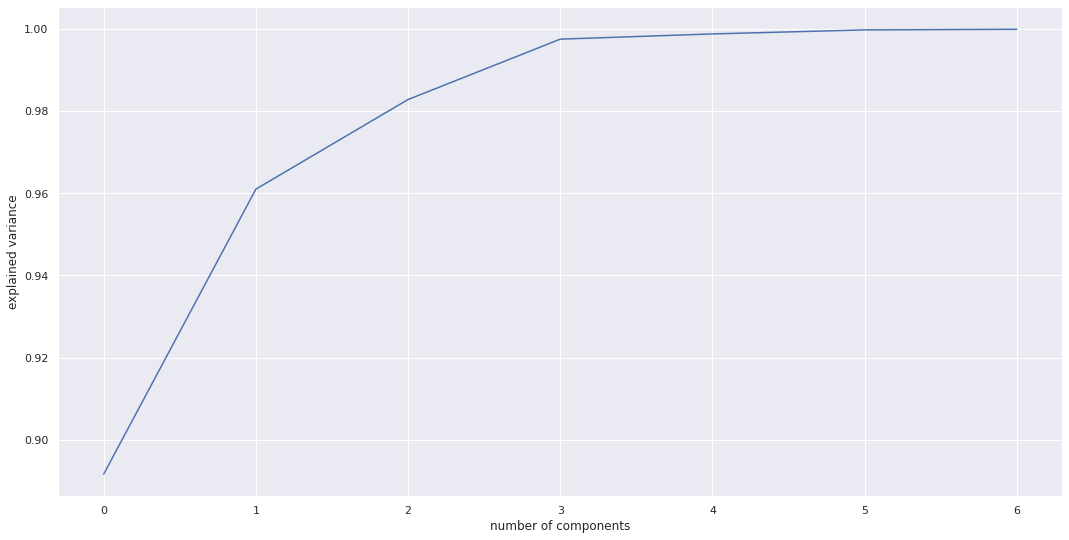

In [27]:
pca = PCA().fit(train.drop(columns=["date"]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

Escogeremos los primeros 4 parametros

In [28]:
pca = PCA(n_components=4).fit(train.drop(columns=["date"]))
components = pca.transform(train.drop(columns=["date"]))
train = pd.DataFrame(components)

In [29]:
train

0         1         2         3
0   -0.539410 -0.117595  0.139513 -0.012668
1   -0.555841 -0.072428  0.031836  0.040649
2   -0.557893 -0.039755  0.092251  0.024581
3   -0.568793  0.040182  0.174452  0.010606
4   -0.539537 -0.114072  0.018362  0.038783
..        ...       ...       ...       ...
360  1.552076  0.006578  0.057552  0.146507
361  1.480375  0.005487  0.068013  0.174747
362  1.511787 -0.046725  0.045426  0.101343
363  1.539266 -0.281684  0.268136  0.070222
364  1.537593 -0.350068  0.065657  0.023386

[365 rows x 4 columns]

In [30]:
train.to_csv(BASE_FOLDER + 'train.csv')

In [31]:
target.drop(columns=["date"]).to_csv(BASE_FOLDER + 'target.csv')

In [32]:
target.drop(columns=["date"])

close    open     min     max
0      8.20    8.17    8.03    8.59
1      8.37    8.19    8.11    8.50
2      9.74    8.43    8.30    9.90
3     11.00    9.57    9.44   11.10
4     10.15   11.16    9.20   11.70
..      ...     ...     ...     ...
360  736.45  749.80  703.27  766.06
361  711.42  736.45  652.00  740.30
362  731.52  711.42  703.02  755.00
363  682.22  731.52  640.43  737.56
364  736.77  682.22  675.56  741.99

[365 rows x 4 columns]

In [34]:
assert len(target) == len(train)